In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from matplotlib import style
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime
from math import sqrt

#ignore the warnings
import warnings
warnings.filterwarnings('ignore')


try:
    import mplfinance as mpf
    import mpl_finance as mplf
    from mpl_finance import candlestick_ohlc
except:
    !pip install mplfinance mpl_finance
    import mplfinance as mpf
    import mpl_finance as mplf
    from mpl_finance import candlestick_ohlc

  Obtaining dependency information for mpl_finance from https://files.pythonhosted.org/packages/9d/de/8169ea4403d6cb8322e74cc48b6834d1dfbed81931d17f1f26b2140160d8/mpl_finance-0.10.1-py3-none-any.whl.metadata


/Users/faezehbahadorirad/anaconda3/lib/python3.11/site-packages/mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [4]:
sbux = pd.read_csv('/Users/faezehbahadorirad/Downloads/archive-4/Starbucks_stock_history.csv')
sbux_info =  pd.read_csv('/Users/faezehbahadorirad/Downloads/archive-4/Starbucks_stock_info.csv', 
                         header=None, 
                         names=(['Description','Information']))
#sbux_info.dropna()
sbux_info.drop(sbux_info.loc[sbux_info['Information']=='nan'].index, inplace=True)
s = sbux_info.sort_values('Information').style
s

<Axes: >

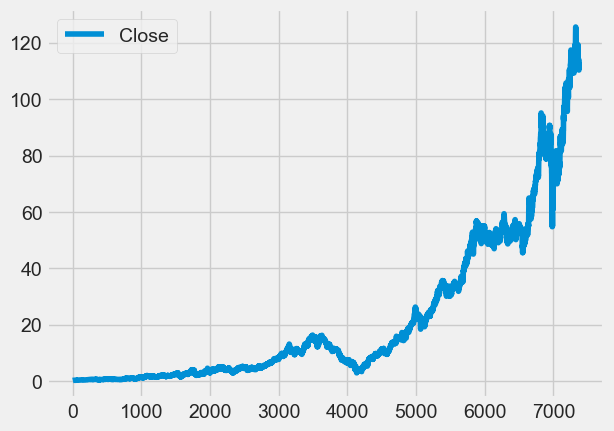

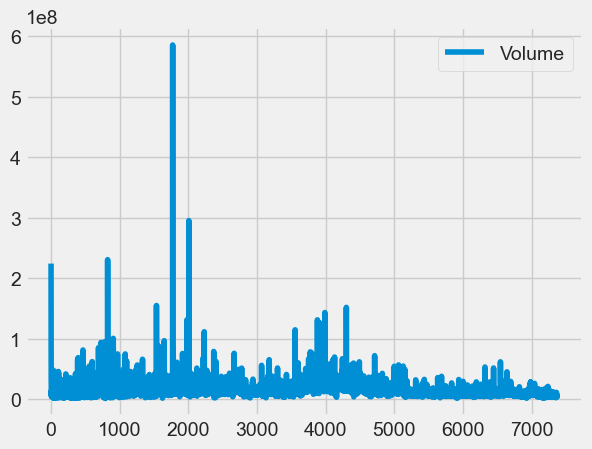

In [5]:
#Closing Price PLot
sbux[["Close"]].plot()
#Volume Plot
sbux[["Volume"]].plot()

In [6]:
sbux2 = pd.read_csv('/Users/faezehbahadorirad/Downloads/archive-4/Starbucks_stock_history.csv', header=0, 
                  index_col= 0, names=['Date','Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Splits'], parse_dates=True)
# Get the number of days in `sbux`
days = (sbux2.index[-1] - sbux2.index[0]).days

# Calculate the CAGR 
cagr = ((((sbux2['Close'][-1]) / sbux2['Close'][1])) ** (365.0/days)) - 1


# Print CAGR
print("The CAGR (Compound Annual Growth Rate) of Starbucks since IPO is " , round((cagr*100),2), "% per year")

The CAGR (Compound Annual Growth Rate) of Starbucks since IPO is  22.49 % per year


In [7]:
# Isolate the adjusted closing prices 
adj_close_px = sbux2['Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

Date
2021-09-20    117.387744
2021-09-21    117.053929
2021-09-22    116.742111
2021-09-23    116.547193
2021-09-24    116.352272
2021-09-27    116.170259
2021-09-28    115.965394
2021-09-29    115.802909
2021-09-30    115.615838
2021-10-01    115.474593
Name: Close, dtype: float64

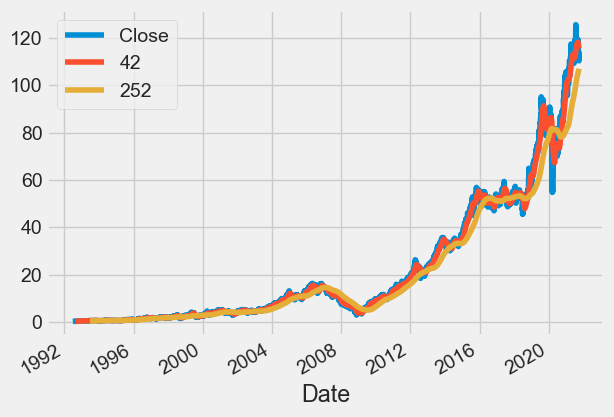

In [8]:
# Short moving window rolling mean
sbux2['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
sbux2['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
sbux2[['Close', '42', '252']].plot()

plt.show()

In [9]:
#OHLC Plot using Plotly
import plotly.graph_objects as go

fig = go.Figure(data=go.Ohlc(x=sbux['Date'],
        open=sbux['Open'],
        high=sbux['High'],
        low=sbux['Low'],
        close=sbux['Close']))
fig.show()

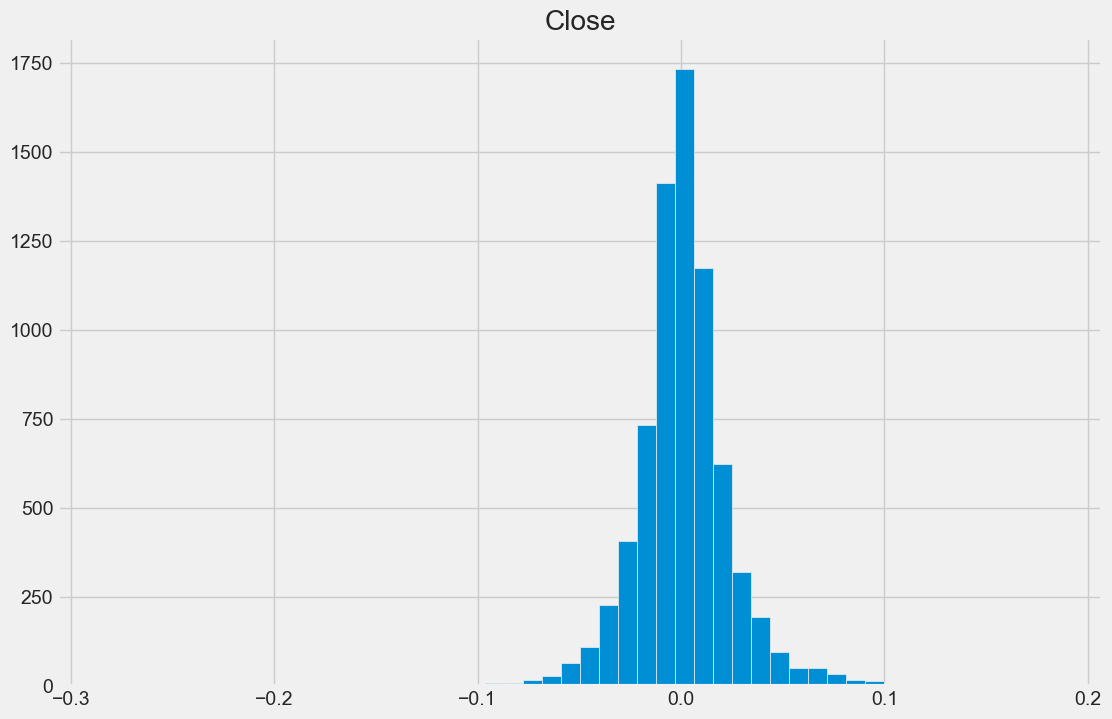

In [10]:
daily_close_px = sbux2[['Close']]
# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

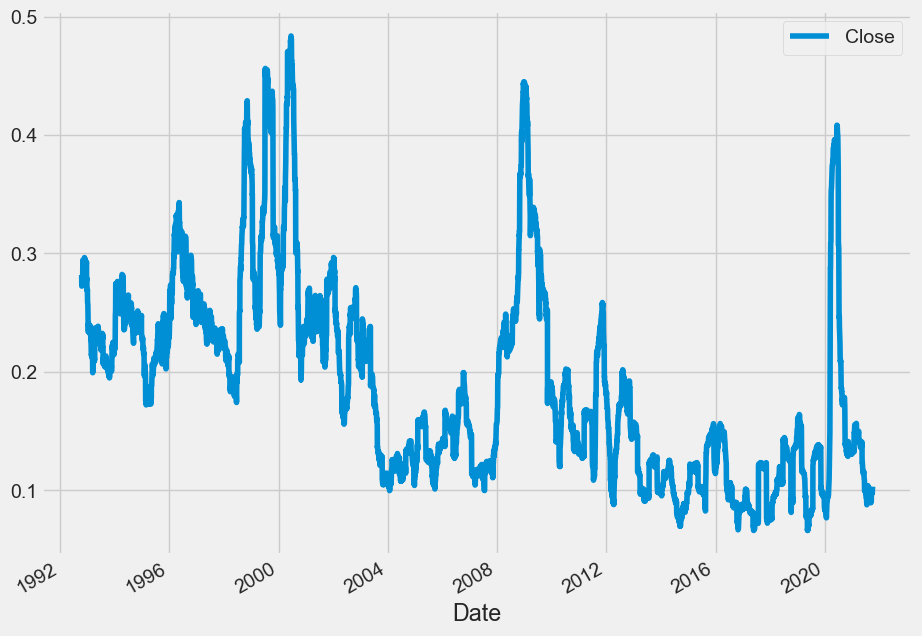

In [11]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

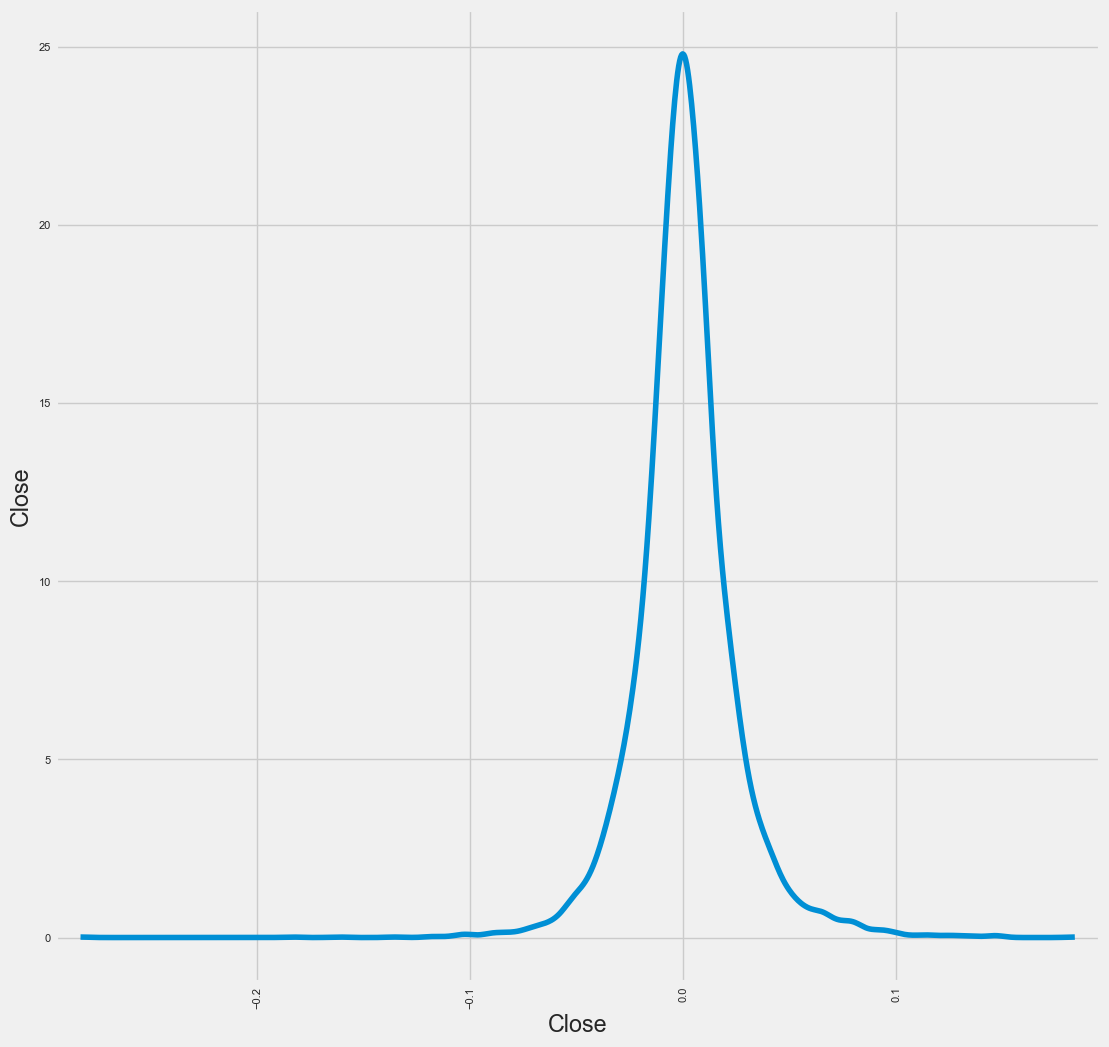

In [12]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

In [13]:
sbux['SMA5'] = sbux.Close.rolling(5).mean()
sbux['SMA20'] = sbux.Close.rolling(20).mean()
sbux['SMA50'] = sbux.Close.rolling(50).mean()
sbux['SMA200'] = sbux.Close.rolling(200).mean()
sbux['SMA500'] = sbux.Close.rolling(500).mean()

fig = go.Figure(data=[go.Ohlc(x=sbux['Date'],
                              open=sbux['Open'],
                              high=sbux['High'],
                              low=sbux['Low'],
                              close=sbux['Close'], name = "OHLC"),
                      go.Scatter(x=sbux.Date, y=sbux.SMA5, line=dict(color='orange', width=1), name="SMA5"),
                      go.Scatter(x=sbux.Date, y=sbux.SMA20, line=dict(color='green', width=1), name="SMA20"),
                      go.Scatter(x=sbux.Date, y=sbux.SMA50, line=dict(color='blue', width=1), name="SMA50"),
                      go.Scatter(x=sbux.Date, y=sbux.SMA200, line=dict(color='violet', width=1), name="SMA200"),
                      go.Scatter(x=sbux.Date, y=sbux.SMA500, line=dict(color='purple', width=1), name="SMA500")])
fig.show()

In [14]:
sbux['EMA5'] = sbux.Close.ewm(span=5, adjust=False).mean()
sbux['EMA20'] = sbux.Close.ewm(span=20, adjust=False).mean()
sbux['EMA50'] = sbux.Close.ewm(span=50, adjust=False).mean()
sbux['EMA200'] = sbux.Close.ewm(span=200, adjust=False).mean()
sbux['EMA500'] = sbux.Close.ewm(span=500, adjust=False).mean()

fig = go.Figure(data=[go.Ohlc(x=sbux['Date'],
                              open=sbux['Open'],
                              high=sbux['High'],
                              low=sbux['Low'],
                              close=sbux['Close'], name = "OHLC"),
                      go.Scatter(x=sbux.Date, y=sbux.SMA5, line=dict(color='orange', width=1), name="EMA5"),
                      go.Scatter(x=sbux.Date, y=sbux.SMA20, line=dict(color='green', width=1), name="EMA20"),
                      go.Scatter(x=sbux.Date, y=sbux.SMA50, line=dict(color='blue', width=1), name="EMA50"),
                      go.Scatter(x=sbux.Date, y=sbux.SMA200, line=dict(color='violet', width=1), name="EMA200"),
                      go.Scatter(x=sbux.Date, y=sbux.SMA500, line=dict(color='purple', width=1), name="EMA500")])
fig.show()

In [15]:
sbux.set_index('Date')

Open        High         Low       Close     Volume  \
Date                                                                    
1992-06-26    0.270957    0.287086    0.264507    0.277409  224358400   
1992-06-29    0.280635    0.303215    0.274183    0.296763   58732800   
1992-06-30    0.303215    0.306440    0.283860    0.287086   34777600   
1992-07-01    0.290312    0.296763    0.280635    0.293538   18316800   
1992-07-02    0.296763    0.296763    0.287086    0.293538   13996800   
...                ...         ...         ...         ...        ...   
2021-09-27  113.610001  114.669998  112.910004  113.680000    3988800   
2021-09-28  112.680000  113.000000  111.080002  111.709999    5917700   
2021-09-29  111.900002  112.519997  111.570000  112.169998    4389100   
2021-09-30  111.519997  112.160004  110.309998  110.309998    5974500   
2021-10-01  110.889999  113.459999  110.540001  112.919998    5244849   

            Dividends  Stock Splits        SMA5     SMA20       SMA50  \
Date                                                                    
1992-06-26        0.0           0.0         NaN       NaN         NaN   
1992-06-29        0.0           0.0         NaN       NaN         NaN   
1992-06-30        0.0           0.0         NaN       NaN         NaN   
1992-07-01        0.0           0.0         NaN       NaN         NaN   
1992-07-02        0.0           0.0    0.289667       NaN         NaN   
...               ...           ...         ...       ...         ...   
2021-09-27        0.0           0.0  113.444000  115.8435  117.220352   
2021-09-28        0.0           0.0  113.342000  115.6485  117.157070   
2021-09-29        0.0           0.0  113.162000  115.3825  117.061149   
2021-09-30        0.0           0.0  112.395999  115.0255  116.891172   
2021-10-01        0.0           0.0  112.157999  114.8030  116.706455   

                SMA200     SMA500        EMA5       EMA20       EMA50  \
Date                                                                    
1992-06-26         NaN        NaN    0.277409    0.277409    0.277409   
1992-06-29         NaN        NaN    0.283861    0.279252    0.278168   
1992-06-30         NaN        NaN    0.284936    0.279999    0.278518   
1992-07-01         NaN        NaN    0.287803    0.281288    0.279107   
1992-07-02         NaN        NaN    0.289714    0.282455    0.279673   
...                ...        ...         ...         ...         ...   
2021-09-27  110.545562  92.398329  113.758481  115.115722  115.771680   
2021-09-28  110.583496  92.458641  113.075654  114.791367  115.612398   
2021-09-29  110.635536  92.517465  112.773769  114.541713  115.477402   
2021-09-30  110.676696  92.572703  111.952512  114.138693  115.274759   
2021-10-01  110.726657  92.634972  112.275007  114.022627  115.182415   

                EMA200     EMA500  
Date                               
1992-06-26    0.277409   0.277409  
1992-06-29    0.277602   0.277487  
1992-06-30    0.277696   0.277525  
1992-07-01    0.277854   0.277589  
1992-07-02    0.278010   0.277652  
...                ...        ...  
2021-09-27  109.209779  96.111184  
2021-09-28  109.234657  96.173455  
2021-09-29  109.263864  96.237313  
2021-09-30  109.274273  96.293492  
2021-10-01  109.310549  96.359865  

[7372 rows x 17 columns]

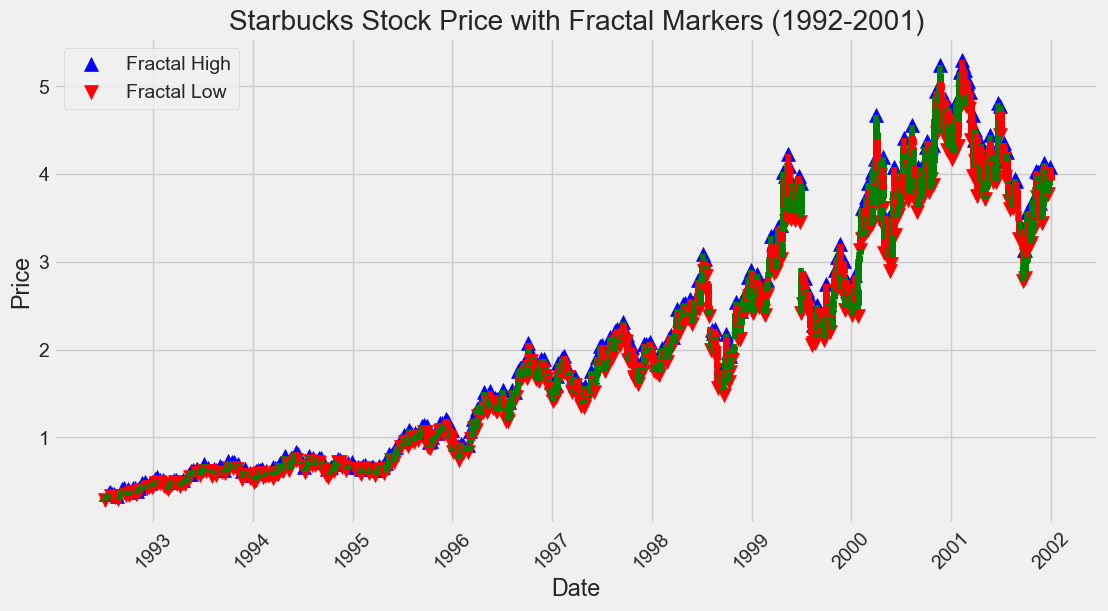

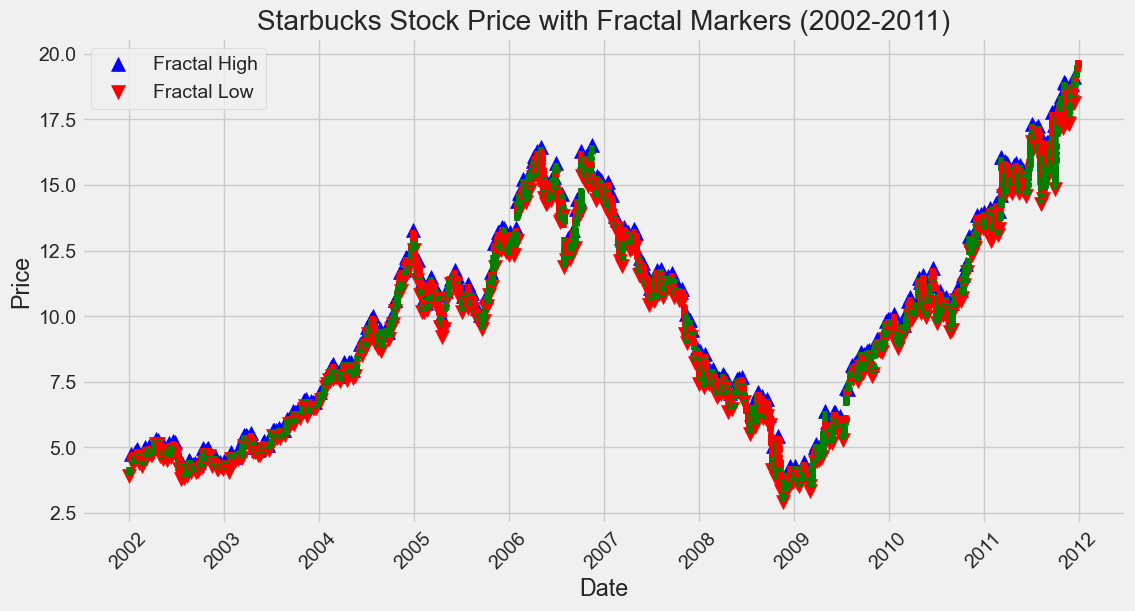

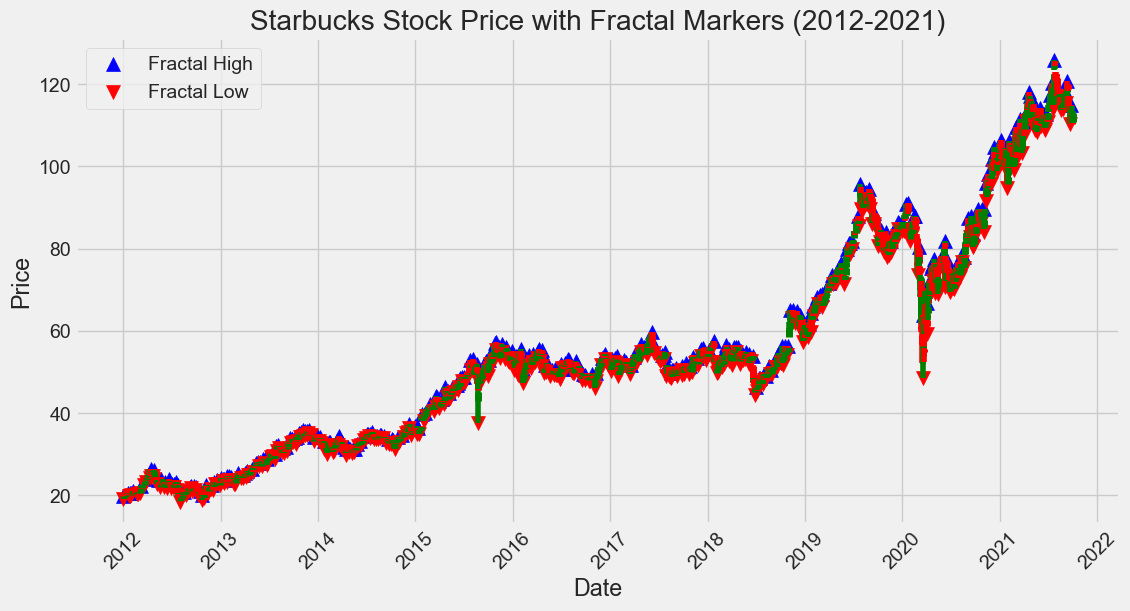

In [17]:
start_year = sbux.index.min().year
end_year = sbux.index.max().year

# Create a plot for each decade
for decade_start in range(start_year, end_year + 1, 10):
    decade_end = min(decade_start + 9, end_year)
    decade_data = sbux[(sbux.index.year >= decade_start) & (sbux.index.year <= decade_end)]
    
    if not decade_data.empty:
        fig, ax = plt.subplots(figsize=(12, 6))
        for idx, row in decade_data.iterrows():
            color = 'green' if row['Close'] >= row['Open'] else 'red'
            plt.plot([mdates.date2num(idx)] * 2, [row['Low'], row['High']], color=color)
            plt.plot([mdates.date2num(idx), mdates.date2num(idx)], [row['Open'], row['Close']], color=color, linewidth=5)

        # Plot fractal markers for the decade
        plt.scatter(decade_data.index[decade_data['Fractal_High']], decade_data['High'][decade_data['Fractal_High']], color='blue', label='Fractal High', marker='^', s=100)
        plt.scatter(decade_data.index[decade_data['Fractal_Low']], decade_data['Low'][decade_data['Fractal_Low']], color='red', label='Fractal Low', marker='v', s=100)

        # Format the x-axis to display dates
        ax.xaxis_date()
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        plt.xticks(rotation=45)

        # Set the plot title and labels
        plt.title(f'Starbucks Stock Price with Fractal Markers ({decade_start}-{decade_end})')
        plt.xlabel('Date')
        plt.ylabel('Price')

        # Show the legend
        plt.legend()

        # Display the plot
        plt.show()